# Forecasting Assignment

## Dataset - CocaCola_Sales_Rawdata

## Objective:-We want predict Cocacola sales

### Importing important Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

#### Load the dataset and underastand it

In [2]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
data.shape

(42, 2)

In [5]:
#checking the null values
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
#Cheking the datatype of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


# Reading the dataset again for visualization


In [8]:
data_vis=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=None,squeeze=True)

In [9]:
data_vis.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

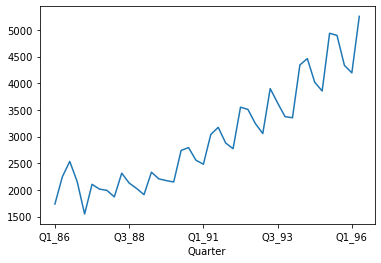

In [10]:
data_vis.plot()

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

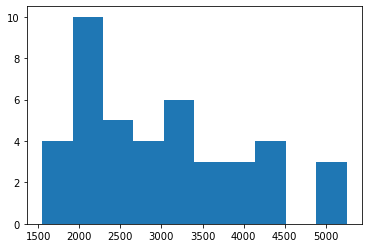

In [11]:
plt.hist(data_vis)

<AxesSubplot:ylabel='Density'>

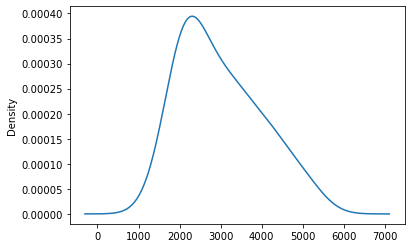

In [12]:
data_vis.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

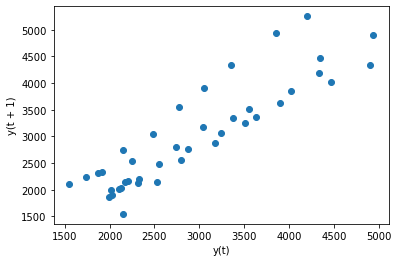

In [13]:
lag_plot(data_vis)

# Model building 

In [14]:
data['Quarters']= 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]
data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [15]:
quater_dumies=pd.DataFrame(pd.get_dummies(data.Quarters))
quater_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [16]:
data=pd.concat([data,quater_dumies],axis=1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [17]:
data['t']=range(1,43)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


In [18]:
data['t_squared']=data.t*data.t
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


In [19]:
data['log_Sales']=np.log(data.Sales)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

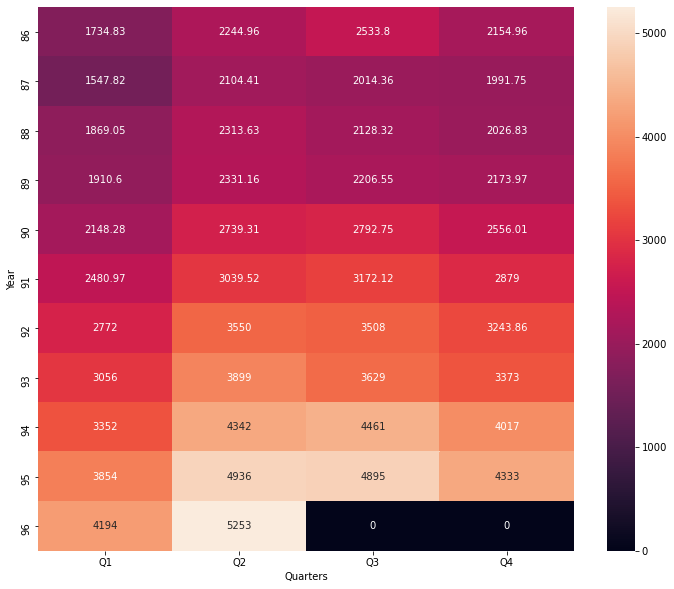

In [20]:
plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data =data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt = "g")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

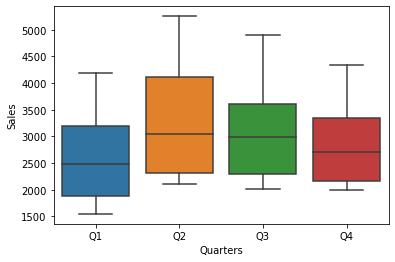

In [21]:
sns.boxplot(x='Quarters',y='Sales',data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

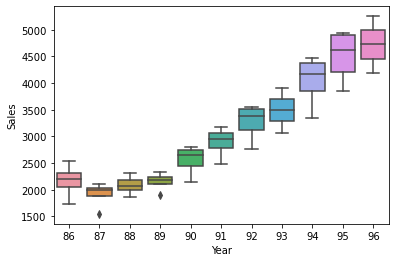

In [22]:
sns.boxplot(x='Year',y='Sales',data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

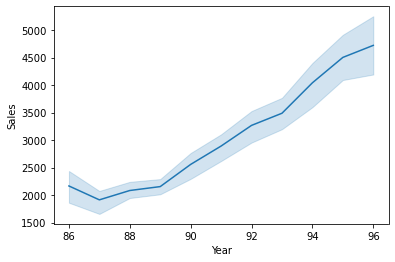

In [23]:
sns.lineplot(x='Year',y='Sales',data=data)

In [24]:
train=data.head(35)
test=data.tail(7)

# Developing the linear model

In [25]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
pred_linear

35    3840.422277
36    3904.126945
37    3967.831612
38    4031.536280
39    4095.240948
40    4158.945616
41    4222.650284
dtype: float64

In [26]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351146

# Developing the model of exponential

In [27]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
pred_exp

35    8.280213
36    8.303351
37    8.326489
38    8.349626
39    8.372764
40    8.395901
41    8.419039
dtype: float64

In [28]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

493.34864848421955

# Developing the model of quadratic

In [29]:
quad_model = smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
pred_quad

35    4337.773235
36    4484.369729
37    4635.446862
38    4791.004635
39    4951.043047
40    5115.562098
41    5284.561789
dtype: float64

In [30]:
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

511.8117319417333

# Developing the model of Additive seasonality 

In [31]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea


35    2549.922247
36    2319.061332
37    2951.555664
38    2938.434220
39    2549.922247
40    2319.061332
41    2951.555664
dtype: float64

In [32]:
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251744

# Developing the model of Additive seasonality quadratic

In [33]:
add_sea_Quad_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
pred_add_sea_quad

35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [34]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.46413951636714

# Developing the model of multiplicative  seasonality

In [35]:
mul_sea_model = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
pred_mult_sea

35    7.823789
36    7.716661
37    7.958124
38    7.951932
39    7.823789
40    7.716661
41    7.958124
dtype: float64

In [36]:
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.9332351966173

# Developing the model of Multiplicative Additive Seasonality

In [37]:
mul_add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
pred_mult_add_sea

35    8.231646
36    8.169836
37    8.411299
38    8.405107
39    8.322281
40    8.260471
41    8.501934
dtype: float64

In [38]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 

339.1874666994789

# Comparing the above results 

In [39]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


# Developing the model of the additive seasonality quadratic gives the best result